# Innoforest - DataFrame EDA

We first import the required packages

In [1]:
import pandas as pd
import rasterio 
import numpy as np
import matplotlib.pyplot as plt
import os
from tqdm import tqdm
import glob
import seaborn as sns


In [2]:
df_val = pd.read_csv(f'tree_species_val.csv')
df_train = pd.read_csv(f'tree_species_train.csv')
df_train.shape

(42512, 964)

In [3]:
df_val.shape

(25184, 964)

In [ ]:
df = pd.concat([df_val,df_train])
df.shape

(50368, 964)

In [8]:
# Deciduous: ('BØG', 'EG', 'REG', 'BIR', 'LÆR', 'ÆR', 'LIN', 'POP', 'ALØ', 'ASK', 'OMO', 'KIR', 'JAL')
# Coniferous: ('SKF', 'DGR', 'RGR', 'SGR', 'AGR', 'ÆGR', 'NOB', 'NGR', 'CYP', 'KRT', 'TSU')

# Rename values in TreeType column
df['tree'] = df['y'].replace({1:'Norway Spruce (C)',
                              2:'Elder (D)',
                              3:'Grandis (C)',
                              4:'Ash (D)',
                              5:'Beech (D)',
                              6:'Birch (D)', 
                              7:'Douglas (C)',
                              8:'Oak (D)',
                              9:'Krat (D)',
                              10:'Larch (C-D)',
                              11:'Nordmann Fir (C)',
                              12:'Noble Fir (C)',
                              13:'Red Oak Tree (D)',
                              14:'Red Fir (C)',
                              15:'Sitka Spruce (C)',
                              16:'Siberian Fir (C)'})

# Rename values in TreeType column
df['Type'] = df['y'].replace({1:'Coniferous',
                              2:'Deciduous',
                              3:'Coniferous',
                              4:'Deciduous',
                              5:'Deciduous',
                              6:'Deciduous', 
                              7:'Coniferous',
                              8:'Deciduous',
                              9:'Deciduous',
                              10:'Deciduous',
                              11:'Coniferous',
                              12:'Coniferous',
                              13:'Deciduous',
                              14:'Coniferous',
                              15:'Coniferous',
                              16:'Coniferous'})



In [9]:
l = df.columns.tolist()
l_split = [i.split('_', 1)[0] for i in l]
empty_list = set()
index_all = [x for x in l_split if x not in empty_list and (empty_list.add(x) or True)]
index_all[2:19]

['y',
 'B02',
 'B03',
 'B04',
 'B05',
 'B06',
 'B07',
 'B08',
 'B11',
 'B12',
 'B8A',
 'ccmi',
 'ndmi',
 'ndti',
 'ndvi',
 're75',
 're8A6']

In [10]:
tree_list = df.tree.unique().tolist()
type_list = df.Type.unique().tolist()

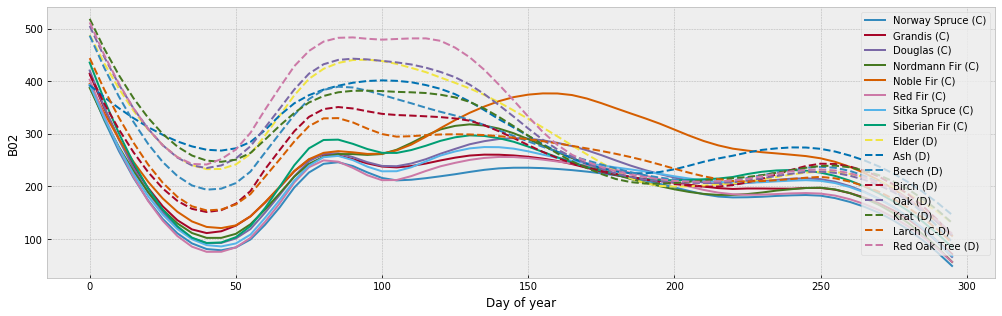

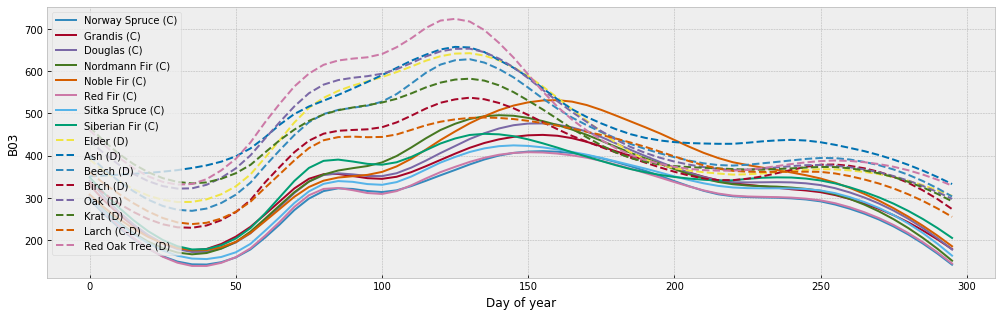

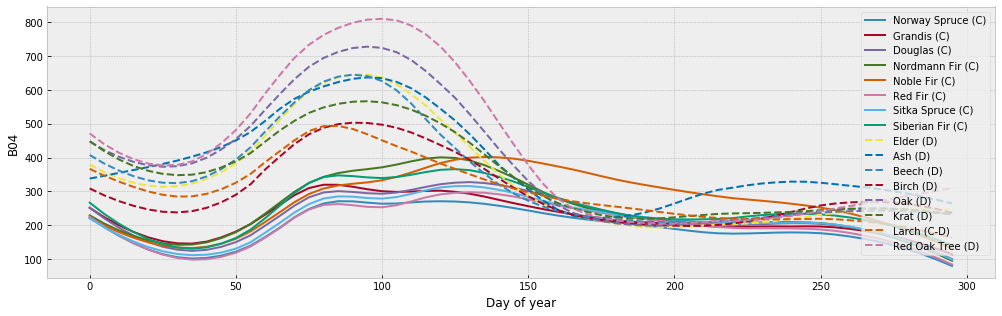

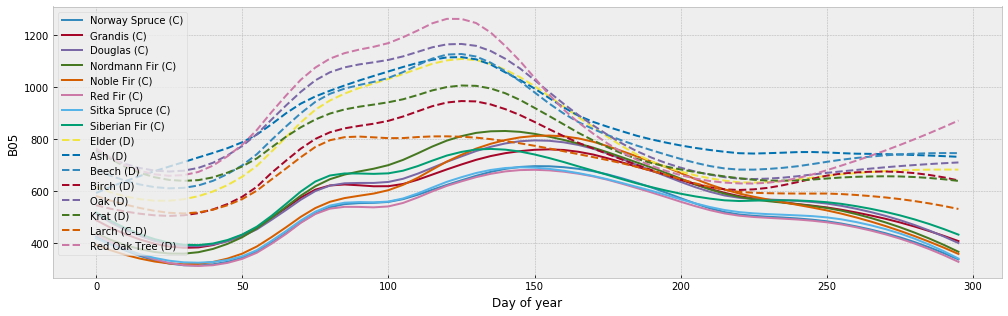

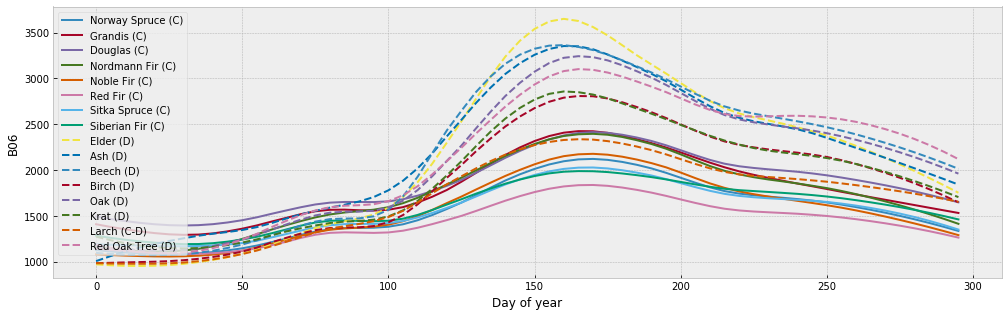

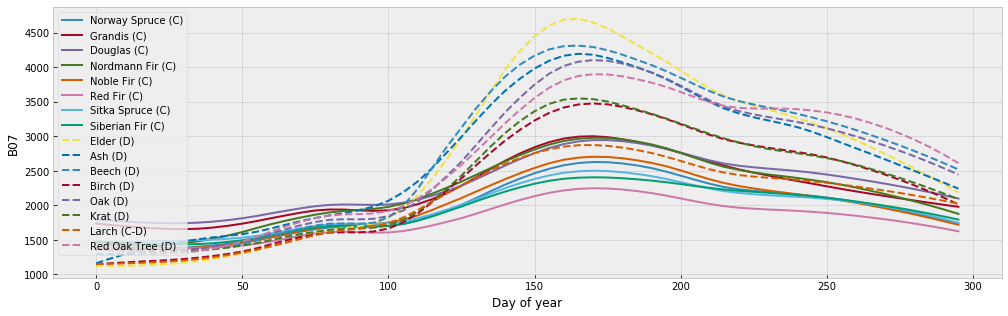

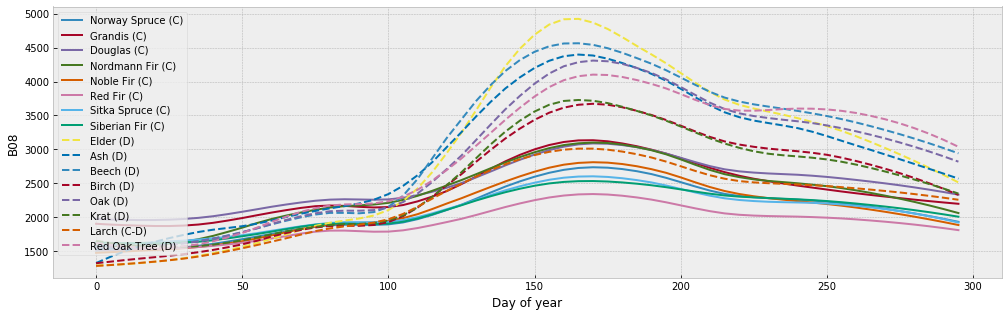

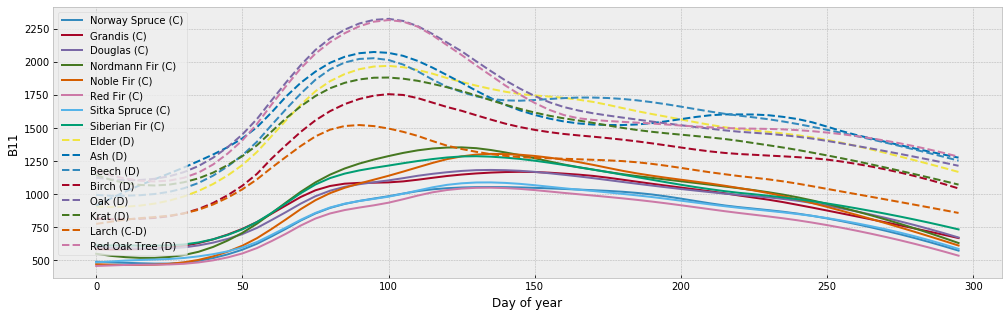

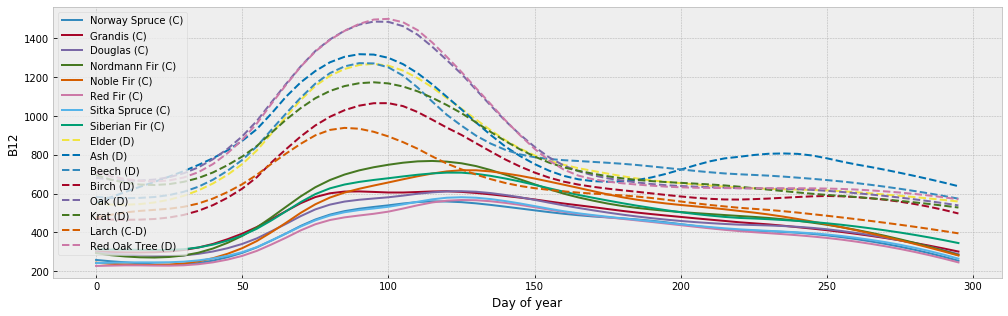

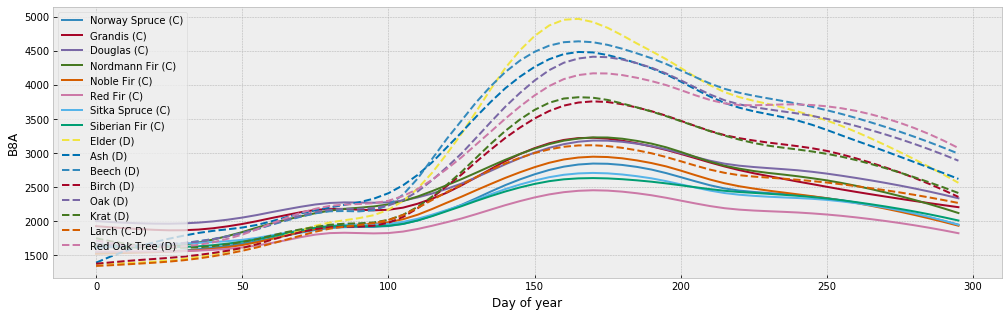

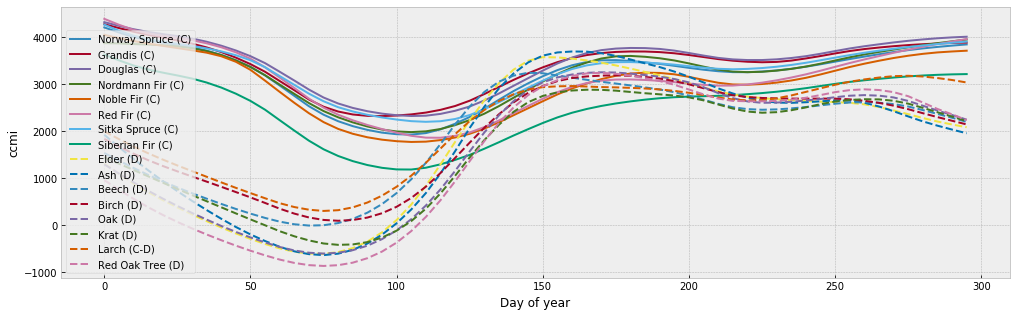

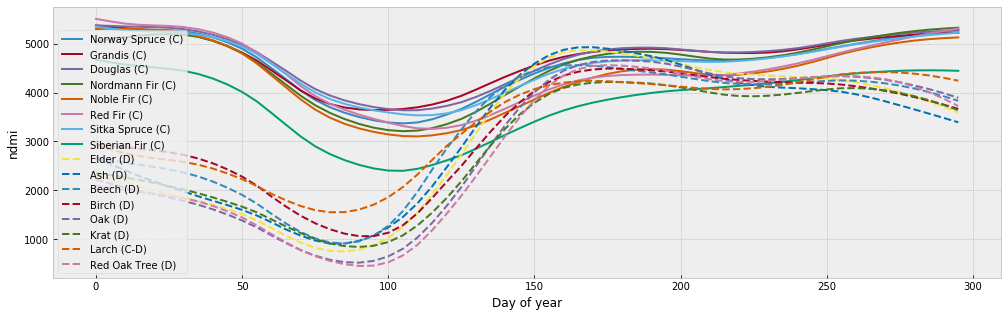

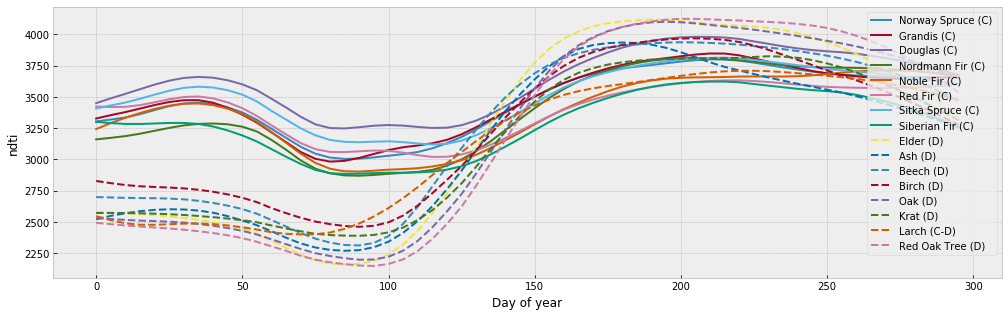

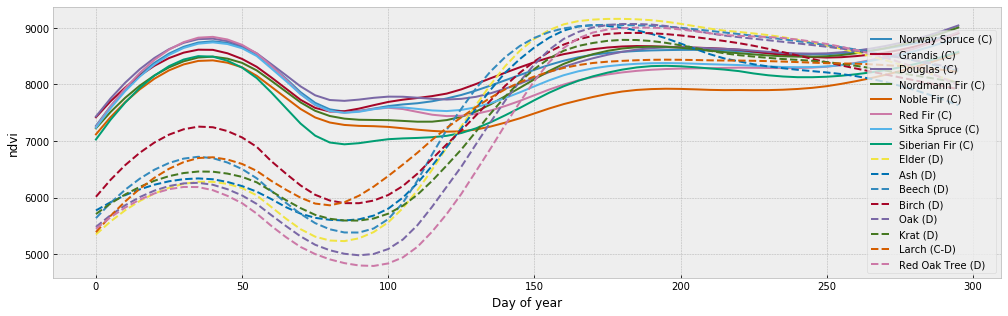

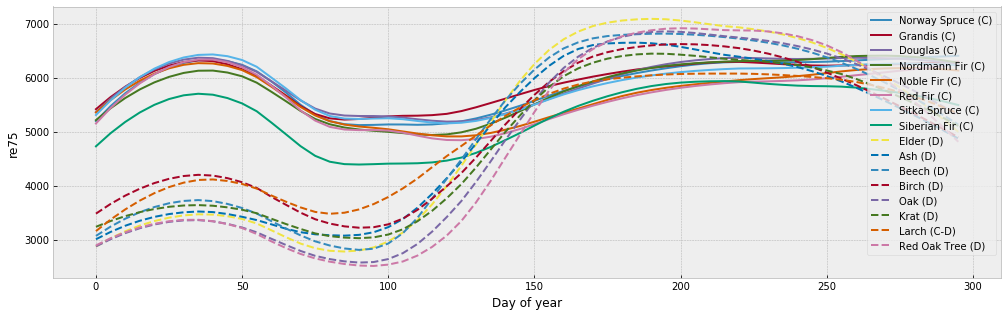

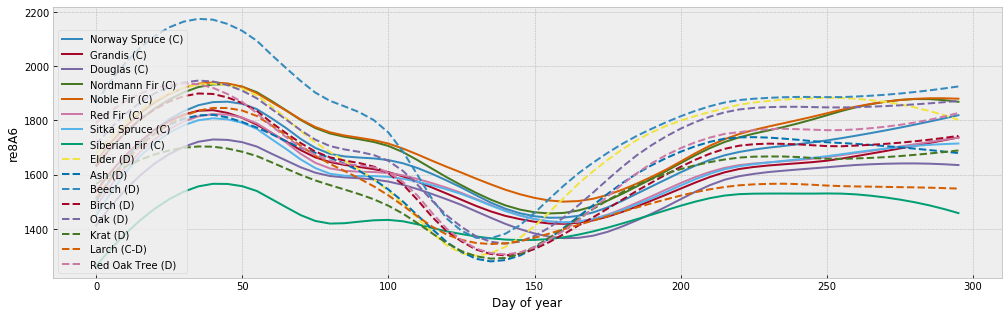

In [11]:
for index in index_all[3:19]:  
    cols = [col for col in df.columns if index in col]
    group_index = np.array(df.groupby('y').mean()[cols])
    plt.figure(figsize = (17, 5))
    plt.style.use('bmh')
    for tree_species in (0,2,6,10,11,13,14,15):
        plt.plot(5*np.arange(group_index.shape[1]), group_index[tree_species, :], label = tree_list[tree_species] )
    for tree_species in (1,3,4,5,7,8,9,12):
        plt.plot(5*np.arange(group_index.shape[1]), group_index[tree_species, :], label = tree_list[tree_species], linestyle='dashed' )
    plt.xlabel('Day of year')
    plt.ylabel(index)
    plt.legend()
    plt.savefig(f'{index}.png')
    

In [12]:
df_c = df.loc[df.Type=='Coniferous']#.groupby('y')
df_d = df.loc[df.Type=='Deciduous']#.groupby('y')


In [14]:
df_mean = df
for index in index_all[3:18]:  
    print(index)
    cols = [col for col in df.columns if index in col]
    df_index = df[cols]
    df_mean[f'mean_year_{index}'] = df_index.loc[:, cols].mean(axis = 1)

B02
B03
B04
B05
B06
B07
B08
B11
B12
B8A
ccmi
ndmi
ndti
ndvi
re75


In [107]:
cols = [col for col in df.columns if 're75' in col]
Q1 = cols[1:15]
Q2 = cols[15:30]
Q3 = cols[30:45]
Q4 = cols[45:60]
Q = [cols[1:15],cols[15:30],cols[30:45],cols[45:60]]
Q_ = ['Q1','Q2','Q3','Q4']

In [116]:
df_mean = df
for index in index_all[3:18]:  
    cols = [col for col in df.columns if index in col]
    df_index = df[cols]
    df_mean[f'mean_year_{index}'] = df_index.loc[:, cols].mean(axis = 1)
    Q = [cols[1:15],cols[15:30],cols[30:45],cols[45:60]]
    for q in Q:
        print(q)
        df_mean[f'mean_year_{index}'] = df_index.loc[:, q].mean(axis = 1)
    

B02
[['B02_010', 'B02_015', 'B02_020', 'B02_025', 'B02_030', 'B02_035', 'B02_040', 'B02_045', 'B02_050', 'B02_055', 'B02_060', 'B02_065', 'B02_070', 'B02_075'], ['B02_080', 'B02_085', 'B02_090', 'B02_095', 'B02_100', 'B02_105', 'B02_110', 'B02_115', 'B02_120', 'B02_125', 'B02_130', 'B02_135', 'B02_140', 'B02_145', 'B02_150'], ['B02_155', 'B02_160', 'B02_165', 'B02_170', 'B02_175', 'B02_180', 'B02_185', 'B02_190', 'B02_195', 'B02_200', 'B02_205', 'B02_210', 'B02_215', 'B02_220', 'B02_225'], ['B02_230', 'B02_235', 'B02_240', 'B02_245', 'B02_250', 'B02_255', 'B02_260', 'B02_265', 'B02_270', 'B02_275', 'B02_280', 'B02_285', 'B02_290', 'B02_295', 'B02_300']]
B03
[['B03_010', 'B03_015', 'B03_020', 'B03_025', 'B03_030', 'B03_035', 'B03_040', 'B03_045', 'B03_050', 'B03_055', 'B03_060', 'B03_065', 'B03_070', 'B03_075'], ['B03_080', 'B03_085', 'B03_090', 'B03_095', 'B03_100', 'B03_105', 'B03_110', 'B03_115', 'B03_120', 'B03_125', 'B03_130', 'B03_135', 'B03_140', 'B03_145', 'B03_150'], ['B03_155'

In [15]:


df_c =df_mean.loc[df_mean.Type=='Coniferous']#.groupby('y')
df_d =df_mean.loc[df_mean.Type=='Deciduous']#.groupby('y')


In [16]:
df_d_mean = df_d[['y','tree','mean_year_B02', 'mean_year_B03', 'mean_year_B04', 'mean_year_B05','mean_year_B06', 'mean_year_B07', 'mean_year_B08', 'mean_year_B11',
       'mean_year_B12', 'mean_year_B8A', 'mean_year_ccmi', 'mean_year_ndmi','mean_year_ndti', 'mean_year_ndvi', 'mean_year_re75']]

df_c_mean = df_c[['y','tree','mean_year_B02', 'mean_year_B03', 'mean_year_B04', 'mean_year_B05','mean_year_B06', 'mean_year_B07', 'mean_year_B08', 'mean_year_B11',
       'mean_year_B12', 'mean_year_B8A', 'mean_year_ccmi', 'mean_year_ndmi','mean_year_ndti', 'mean_year_ndvi', 'mean_year_re75']]


/home/jovyan/.conda/envs/py3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/home/jovyan/.conda/envs/py3/lib/python3.6/site-packages/matplotlib/contour.py:1004: UserWarning: The following kwargs were not used by contour: 'wide', 'aspect'
  s)


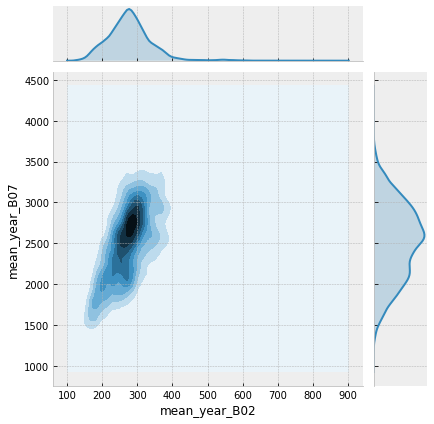

In [17]:
sns.jointplot(x="mean_year_B02", y="mean_year_B07",data=df_d, kind="kde",wide = 10, aspect = 3)
plt.show();

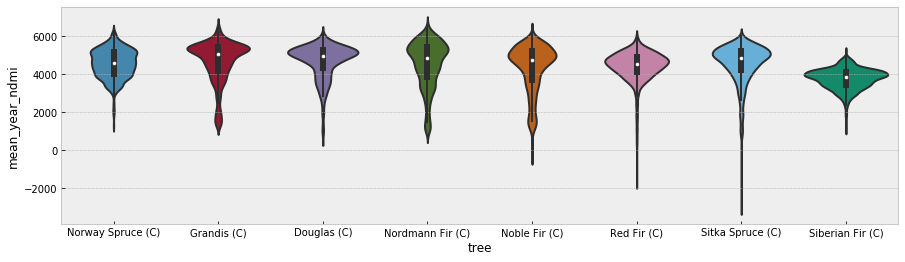

In [25]:
plt.figure(figsize=(15,4))
sns.violinplot(x="tree", y="mean_year_ndmi", data=df_c_mean)
plt.show()

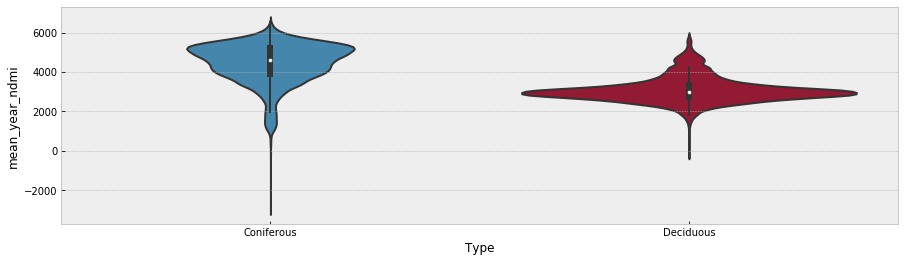

In [65]:
plt.figure(figsize=(15,4))
sns.violinplot(x="Type", y="mean_year_ndmi", data=df_mean)
plt.show()

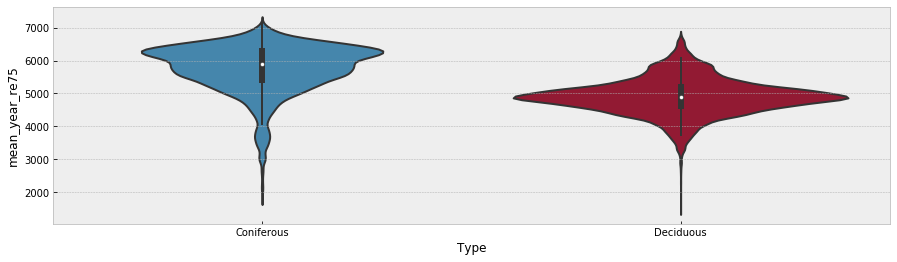

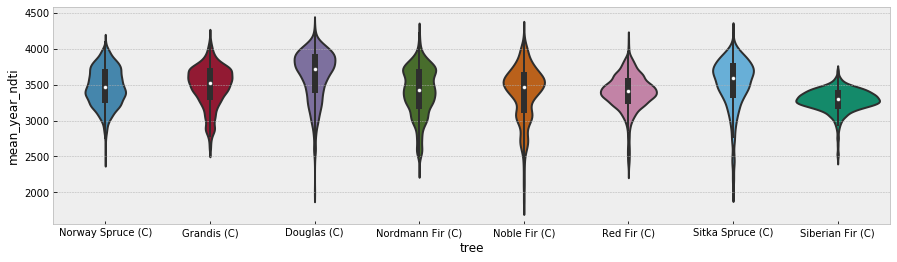

In [26]:
plt.figure(figsize=(15,4))
sns.violinplot(x="tree", y="mean_year_ndti", data=df_c_mean)
plt.show()

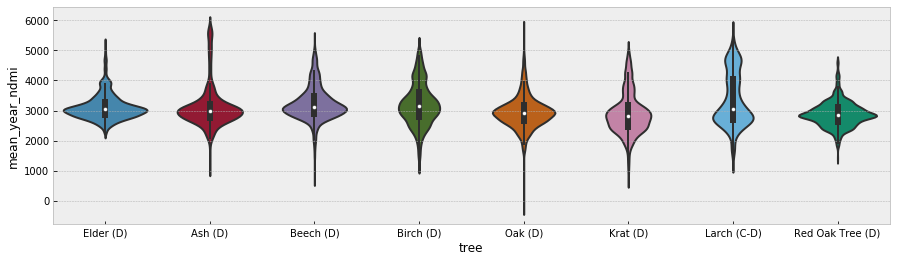

In [75]:
plt.figure(figsize=(15,4))
sns.violinplot(x="tree", y="mean_year_ndmi", data=df_d_mean)
plt.show()

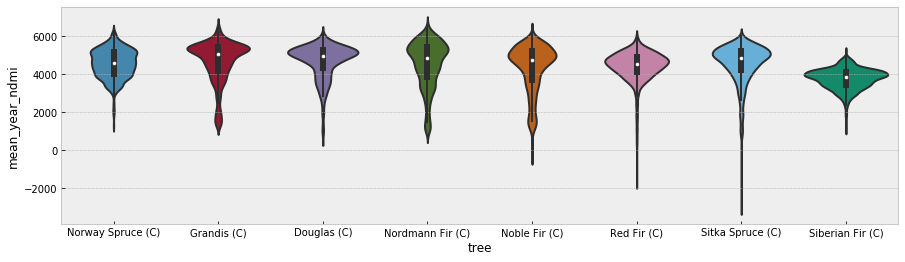

In [76]:
plt.figure(figsize=(15,4))
sns.violinplot(x="tree", y="mean_year_ndmi", data=df_c_mean)
plt.show()

In [50]:
df_c =df_mean.loc[df_mean.Type=='Coniferous']#.groupby('y')
df_d =df_mean.loc[df_mean.Type=='Deciduous']#.groupby('y')

